In [2]:
# Setup: Import all libraries we'll need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re

# Display settings for better output
pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

print("📚 Libraries imported - ready for analysis!")

📚 Libraries imported - ready for analysis!


In [31]:
# Load your scraped cultural data
# Replace 'your_filename.csv' with your actual file name

# If you're in Google Colab, upload your file first:
from google.colab import files
uploaded = files.upload()

# Load your data (fill in your filename)
df = pd.read_csv('rottentomatoes.csv')  # Replace with your CSV filename

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")

KeyboardInterrupt: 

In [4]:
# Checkpoint 1: Verify your data loaded correctly
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Replace 'YOUR_TEXT_COLUMN' with your actual text column name
text_column = 'audience-reviews__name'  # Fill in your main text column name

print(f"Text column has {df[text_column].isna().sum()} missing values")
print(f"Sample text: {df[text_column].iloc[0][:200]}")

Dataset shape: (200, 3)
Columns: ['audience-reviews__name', 'audience-reviews__duration', 'audience-reviews__review']
Text column has 0 missing values
Sample text: DJ


In [5]:
# Explore your dataset structure
print("=== DATASET EXPLORATION ===")
print(f"Total entries: {len(df)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows:")
df.head()

=== DATASET EXPLORATION ===
Total entries: 200

Data types:
audience-reviews__name        object
audience-reviews__duration    object
audience-reviews__review      object
dtype: object

First few rows:


,audience-reviews__name,audience-reviews__duration,audience-reviews__review
0,DJ,"Oct 3, 2025",I like the movie and I think it's a good first...
1,Matt D,"Oct 3, 2025","Special effects lacked, the plot was lacking, ..."
2,PIXELEYE P,"Oct 3, 2025",This movie is HOPE!\nSuperman (2025) finally p...
3,Maddison K.,"Oct 3, 2025",Good enough for a fun family movie night! Made...
4,Richard L,"Oct 3, 2025",I am SOOOOO glad I passed on this in theaters....


In [6]:
# Enhanced stopwords list (building on HW1)
stopwords = [
    # Basic stopwords from HW1
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most", "other", "some",
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",

    # Additional common words for cultural data
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way", "may",
    "said", "say", "new", "first", "last", "long", "little", "much", "well", "still"
]

print(f"✅ Stopwords list loaded: {len(stopwords)} words to filter out")

✅ Stopwords list loaded: 151 words to filter out


In [7]:
# Text processing functions (building on HW1 approach)
def split_into_words(text):
    """Split text into words (same approach as HW1)"""
    if pd.isna(text):  # Handle missing text
        return []
    lowercase_text = str(text).lower()
    # Split text into words by looking for places where letters/numbers are not present
    split_words = re.split("\\W+", lowercase_text)
    return [word for word in split_words if word]  # Remove empty strings

def clean_for_sentiment(text):
    """Clean text for sentiment analysis (keep punctuation!)"""
    if pd.isna(text):
        return ""
    # Keep punctuation and capitalization - VADER needs them!
    return str(text).strip()

print("✅ Text processing functions ready")

✅ Text processing functions ready


In [8]:
# Apply text cleaning to your dataset
# Replace 'text_column' with your actual column name

# Create cleaned text for sentiment analysis (keep punctuation)
df['clean_text_sentiment'] = df['audience-reviews__review'].apply(clean_for_sentiment)

# Create word lists for term frequency analysis (like HW1)
df['words'] = df['audience-reviews__review'].apply(split_into_words)
df['meaningful_words'] = df['words'].apply(lambda word_list: [word for word in word_list if word not in stopwords])

print("✅ Text cleaning complete")
print(f"Sample cleaned text for sentiment: {df['clean_text_sentiment'].iloc[0][:100]}...")
print(f"Sample meaningful words: {df['meaningful_words'].iloc[0][:10]}")

✅ Text cleaning complete
Sample cleaned text for sentiment: I like the movie and I think it's a good first movie for the restart, I hope they can capitalize...
Sample meaningful words: ['like', 'movie', 'think', 'good', 'movie', 'restart', 'hope', 'capitalize']


In [9]:
# Checkpoint 2: Check your cleaning worked
sample_text = df[text_column].iloc[0]
print(f"Original: {sample_text[:100]}")
print(f"For sentiment: {df['clean_text_sentiment'].iloc[0][:100]}")
print(f"Meaningful words: {df['meaningful_words'].iloc[0][:15]}")
# Should show: sentiment text keeps punctuation, meaningful words exclude stopwords

Original: DJ
For sentiment: I like the movie and I think it's a good first movie for the restart, I hope they can capitalize
Meaningful words: ['like', 'movie', 'think', 'good', 'movie', 'restart', 'hope', 'capitalize']


In [10]:
# Combine all meaningful words from your dataset (like HW1)
all_meaningful_words = []
for word_list in df['meaningful_words']:
    all_meaningful_words.extend(word_list)

# Count word frequencies (same as HW1)
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)  # Get top 20 words

print("🔤 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print(f"\nTop 20 most frequent words:")

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 6,296
Unique words found: 2,279

Top 20 most frequent words:
 1. superman        (219 times)
 2. movie           (210 times)
 3. like            (69 times)
 4. good            (49 times)
 5. character       (39 times)
 6. film            (39 times)
 7. movies          (38 times)
 8. gunn            (34 times)
 9. lex             (33 times)
10. great           (32 times)
11. characters      (30 times)
12. bad             (30 times)
13. super           (30 times)
14. really          (30 times)
15. ever            (29 times)
16. james           (29 times)
17. story           (28 times)
18. fun             (28 times)
19. better          (27 times)
20. made            (27 times)


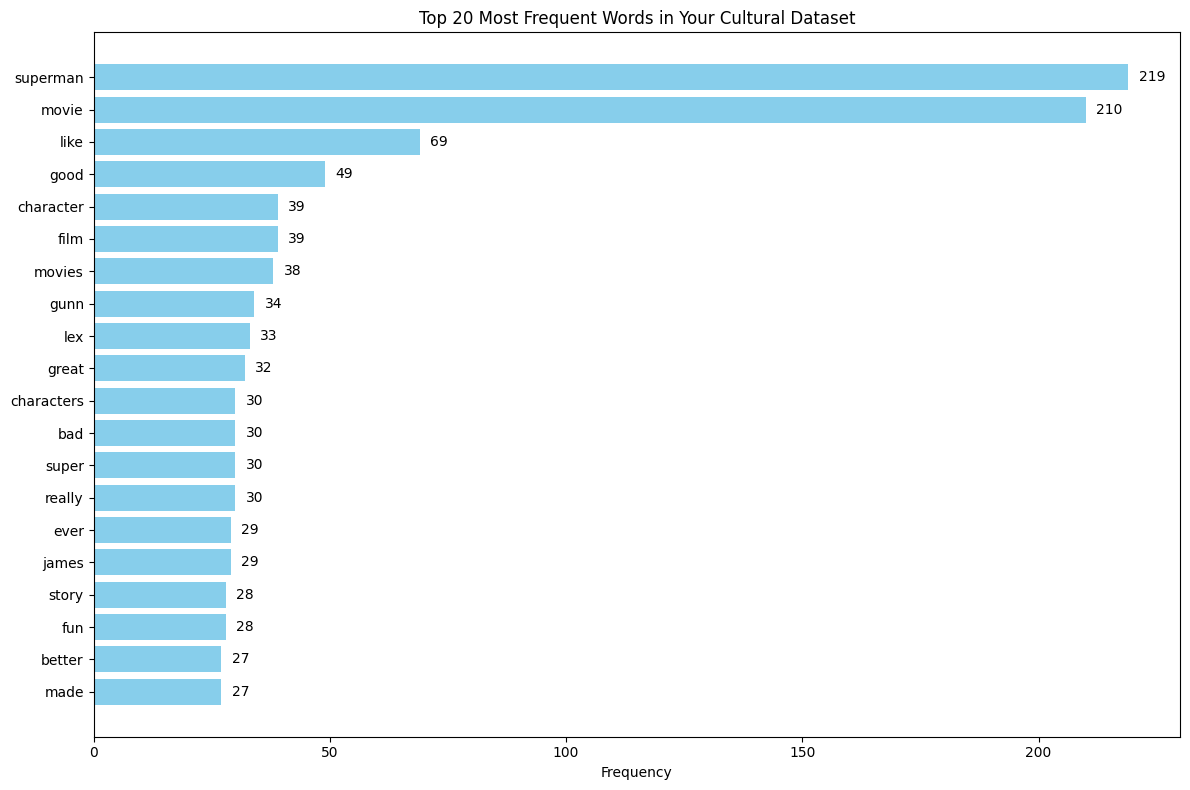

📊 Term frequency visualization complete!


In [11]:
# Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Your Cultural Dataset')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("📊 Term frequency visualization complete!")

In [12]:
# Install and import VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

print("✅ VADER installed and ready for sentiment analysis!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.4 MB/s eta 0:00:00
✅ VADER installed and ready for sentiment analysis!


In [13]:
# Checkpoint 3: VADER setup
test_text = "This assignment is surprisingly interesting!"
test_result = analyzer.polarity_scores(test_text)
print(f"Test text: {test_text}")
print(f"VADER result: {test_result}")
# Should see: {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6588} (or similar)

Test text: This assignment is surprisingly interesting!
VADER result: {'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'compound': 0.636}


In [14]:
# Apply sentiment analysis to your entire dataset
def get_sentiment_score(text):
    """Get compound sentiment score for a text"""
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to your entire dataset
df['sentiment_score'] = df['clean_text_sentiment'].apply(get_sentiment_score)

print("✅ Sentiment analysis complete for entire dataset!")
print(f"\nSentiment score range: {df['sentiment_score'].min():.3f} to {df['sentiment_score'].max():.3f}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")

✅ Sentiment analysis complete for entire dataset!

Sentiment score range: -0.974 to 0.998
Average sentiment: 0.244


In [15]:
# Analyze sentiment patterns in your data
print("🎭 SENTIMENT ANALYSIS SUMMARY")
print("=" * 35)

# Basic statistics
print(f"Total entries analyzed: {len(df)}")
print(f"Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"Most positive entry: {df['sentiment_score'].max():.3f}")
print(f"Most negative entry: {df['sentiment_score'].min():.3f}")
print(f"Standard deviation: {df['sentiment_score'].std():.3f}")

# Categorize sentiments
positive = len(df[df['sentiment_score'] > 0.1])
neutral = len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])
negative = len(df[df['sentiment_score'] < -0.1])

print(f"\nSentiment distribution:")
print(f"Positive (>0.1): {positive} ({positive/len(df)*100:.1f}%)")
print(f"Neutral (-0.1 to 0.1): {neutral} ({neutral/len(df)*100:.1f}%)")
print(f"Negative (<-0.1): {negative} ({negative/len(df)*100:.1f}%)")

🎭 SENTIMENT ANALYSIS SUMMARY
Total entries analyzed: 200
Average sentiment: 0.244
Most positive entry: 0.998
Most negative entry: -0.974
Standard deviation: 0.681

Sentiment distribution:
Positive (>0.1): 118 (59.0%)
Neutral (-0.1 to 0.1): 17 (8.5%)
Negative (<-0.1): 65 (32.5%)


In [16]:
# Find most positive and negative examples
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print(f"📈 MOST POSITIVE ENTRY (score: {most_positive['sentiment_score']:.3f}):")
print(f"Text: {most_positive['clean_text_sentiment'][:200]}...")
print()
print(f"📉 MOST NEGATIVE ENTRY (score: {most_negative['sentiment_score']:.3f}):")
print(f"Text: {most_negative['clean_text_sentiment'][:200]}...")

📈 MOST POSITIVE ENTRY (score: 0.998):
Text: I thought it was pretty fine. I appreciate what it does as the cinematic genesis for this new Gods and Monsters DCU, but it definitely could've been way better. If they took time to flesh out more sho...

📉 MOST NEGATIVE ENTRY (score: -0.974):
Text: Absolute worst superman of all time. please if you like the character of superman , for the love of god DON'T watch this film. It just isnt superman. If you enjoy the film fine, but just know this is ...


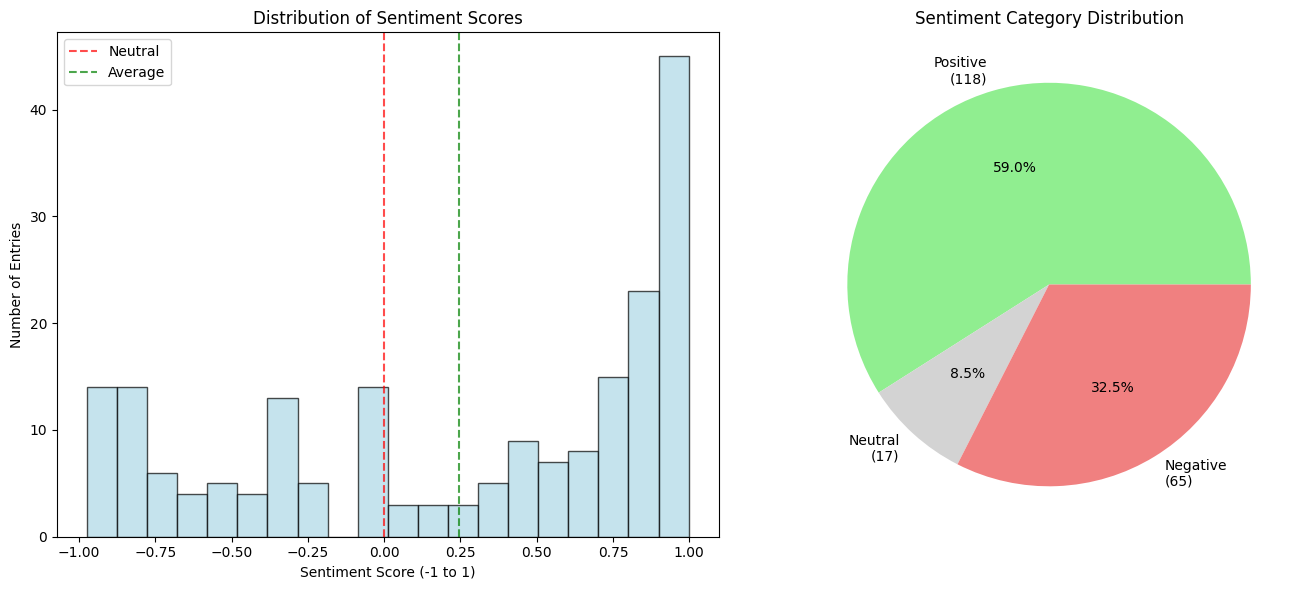

📊 Sentiment visualizations complete!


In [17]:
# Create sentiment visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sentiment distribution histogram
axes[0].hist(df['sentiment_score'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score (-1 to 1)')
axes[0].set_ylabel('Number of Entries')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7, label='Neutral')
axes[0].axvline(df['sentiment_score'].mean(), color='green', linestyle='--', alpha=0.7, label='Average')
axes[0].legend()

# Sentiment categories pie chart
sentiment_counts = [positive, neutral, negative]
sentiment_labels = [f'Positive\n({positive})', f'Neutral\n({neutral})', f'Negative\n({negative})']
colors = ['lightgreen', 'lightgray', 'lightcoral']

axes[1].pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Sentiment Category Distribution')

plt.tight_layout()
plt.show()

print("📊 Sentiment visualizations complete!")

In [18]:
# Sample 5 entries for human vs. VADER comparison
sample_entries = df.sample(5)

print("🧠 HUMAN vs. VADER SENTIMENT COMPARISON")
print("=" * 45)
print("Read each text below and judge its sentiment, then compare to VADER's score:\n")

for i, (idx, row) in enumerate(sample_entries.iterrows(), 1):
    print(f"Text {i}:")
    print(f"'{row['clean_text_sentiment'][:150]}...'")
    print(f"VADER Score: {row['sentiment_score']:.3f}")
    print(f"Your Human Judgment: _____ (Positive/Neutral/Negative)")
    print(f"Agreement? _____ (Yes/No - explain any differences)")
    print()

🧠 HUMAN vs. VADER SENTIMENT COMPARISON
Read each text below and judge its sentiment, then compare to VADER's score:

Text 1:
'(Spoilers)
I am so sad. I was really looking forward to the James Gunn reboot but my hopes have been dashed. How this movie gets a rating of over 80% ...'
VADER Score: 0.630
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 2:
'Overall I thought it was very entertaining.  Wish I’d have seen it in the theater....'
VADER Score: 0.733
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 3:
'It oscillates from pretty original and genuinely enjoyable to the corniest emotional porn imaginable but overall worth watching....'
VADER Score: 0.747
Your Human Judgment: _____ (Positive/Neutral/Negative)
Agreement? _____ (Yes/No - explain any differences)

Text 4:
'Honestly this movie was bad. A 90% rating for this movie is insane. Would give it a 56%, ma

In [19]:
# Analyze word frequency in positive vs. negative entries
positive_entries = df[df['sentiment_score'] > 0.1]
negative_entries = df[df['sentiment_score'] < -0.1]

print("🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES")
print("=" * 55)

# Get top words from positive entries
positive_words = []
for word_list in positive_entries['meaningful_words']:
    positive_words.extend(word_list)
positive_freq = Counter(positive_words)

# Get top words from negative entries
negative_words = []
for word_list in negative_entries['meaningful_words']:
    negative_words.extend(word_list)
negative_freq = Counter(negative_words)

print(f"Top 10 words in POSITIVE entries ({len(positive_entries)} entries):")
for word, count in positive_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

print(f"\nTop 10 words in NEGATIVE entries ({len(negative_entries)} entries):")
for word, count in negative_freq.most_common(10):
    print(f"  {word:<15} ({count} times)")

🔍 COMPARING WORDS IN POSITIVE vs. NEGATIVE ENTRIES
Top 10 words in POSITIVE entries (118 entries):
  superman        (150 times)
  movie           (145 times)
  like            (54 times)
  good            (42 times)
  great           (30 times)
  film            (29 times)
  lex             (28 times)
  fun             (26 times)
  character       (23 times)
  movies          (23 times)

Top 10 words in NEGATIVE entries (65 entries):
  superman        (63 times)
  movie           (57 times)
  worst           (19 times)
  ever            (15 times)
  like            (15 times)
  character       (15 times)
  bad             (14 times)
  movies          (13 times)
  gunn            (12 times)
  seen            (10 times)


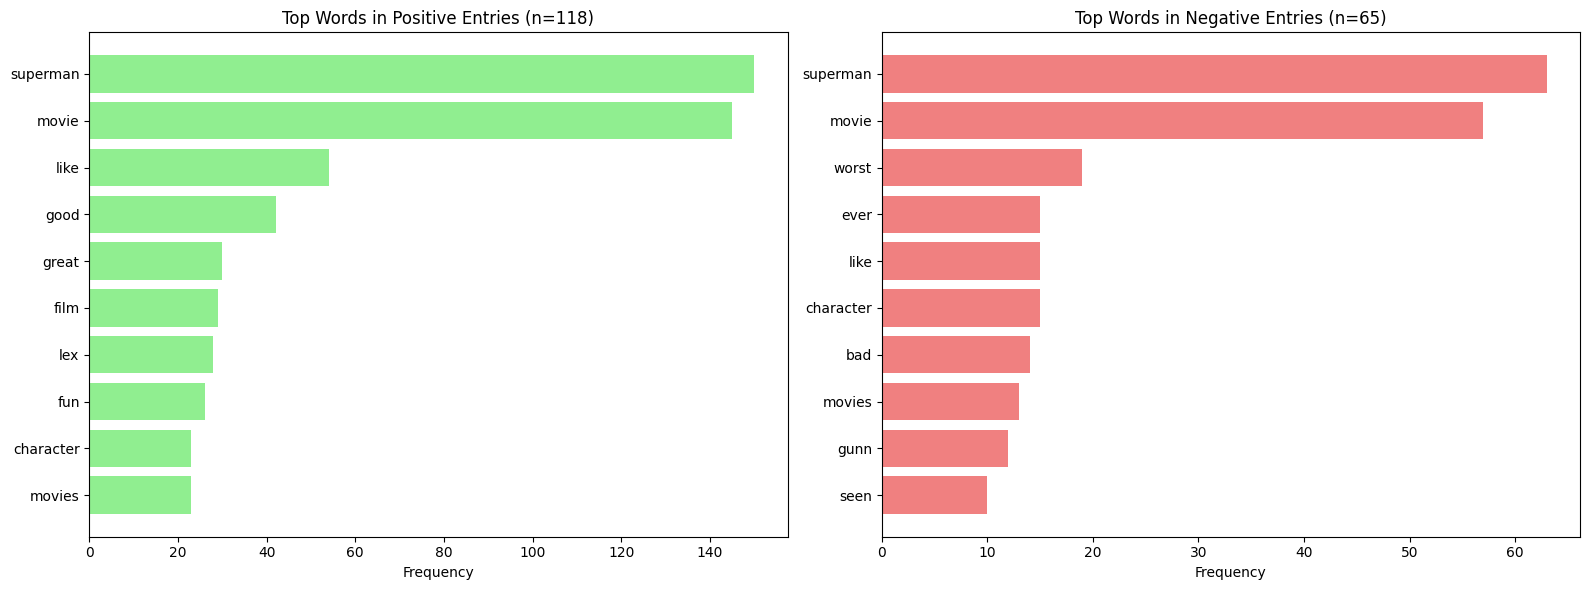

In [20]:
# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positive words
pos_words = [word for word, count in positive_freq.most_common(10)]
pos_counts = [count for word, count in positive_freq.most_common(10)]

axes[0].barh(range(len(pos_words)), pos_counts, color='lightgreen')
axes[0].set_yticks(range(len(pos_words)))
axes[0].set_yticklabels(pos_words)
axes[0].set_title(f'Top Words in Positive Entries (n={len(positive_entries)})')
axes[0].set_xlabel('Frequency')
axes[0].invert_yaxis()

# Negative words
neg_words = [word for word, count in negative_freq.most_common(10)]
neg_counts = [count for word, count in negative_freq.most_common(10)]

axes[1].barh(range(len(neg_words)), neg_counts, color='lightcoral')
axes[1].set_yticks(range(len(neg_words)))
axes[1].set_yticklabels(neg_words)
axes[1].set_title(f'Top Words in Negative Entries (n={len(negative_entries)})')
axes[1].set_xlabel('Frequency')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [21]:
# Save your cleaned dataset
output_filename = 'Adeoye_HW4-1_cleaned_data.csv'  # Replace LASTNAME with your actual last name
df.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as: {output_filename}")
print(f"\nDataset summary:")
print(f"- Total entries: {len(df)}")
print(f"- Columns: {df.columns.tolist()}")
print(f"- Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"- Most frequent word: '{top_words[0][0]}' ({top_words[0][1]} times)")

✅ Cleaned dataset saved as: Adeoye_HW4-1_cleaned_data.csv

Dataset summary:
- Total entries: 200
- Columns: ['audience-reviews__name', 'audience-reviews__duration', 'audience-reviews__review', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score']
- Average sentiment score: 0.244
- Most frequent word: 'superman' (219 times)


In [22]:
# STEP 1: Install Required Libraries
# Run this cell ONCE, then follow the instructions below

print("📦 Installing dependencies (this takes ~30 seconds)...")
print("=" * 60)

# Uninstall conflicting packages
!pip uninstall -y numpy pandas scipy

# Install compatible versions together
!pip install -q numpy==1.26.4 pandas==2.2.2 scipy==1.13.1

# Install gensim and nltk
!pip install -q gensim==4.3.3 nltk

print("\n" + "=" * 60)
print("✅ Installation complete!")
print("=" * 60)
print("\n🔄 🔄 🔄 STOP! MANDATORY NEXT STEP 🔄 🔄 🔄")
print("\nYou MUST restart the runtime before continuing:")
print("   1. Click 'Runtime' in the menu bar above")
print("   2. Select 'Restart runtime'")
print("   3. When prompted, click 'Yes' to confirm")
print("   4. Then run the NEXT cell to import libraries")
print("\n⚠️  Do NOT skip this step or you will get errors!")
print("=" * 60)

📦 Installing dependencies (this takes ~30 seconds)...
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 14.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_ver

In [1]:
# STEP 2: Import Libraries
# Run this cell ONLY AFTER restarting runtime

print("📚 Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("=" * 60)
print("✅ All libraries loaded and ready!")
print("=" * 60)
print(f"NumPy version: {np.__version__}")
print(f"Gensim version: {gensim.__version__}")
print("\n🎉 You're ready to proceed with the assignment!")

📚 Importing libraries...
✅ All libraries loaded and ready!
NumPy version: 1.26.4
Gensim version: 4.3.3

🎉 You're ready to proceed with the assignment!


In [2]:
# Load your cleaned dataset from HW4-1
# If you're in Google Colab, upload your file first:
# from google.colab import files
# uploaded = files.upload()

# Load your HW4-1 cleaned data
df = pd.read_csv('Adeoye_HW4-1_cleaned_data.csv')  # Replace with your HW4-1 cleaned CSV filename

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")
print(f"\nColumns available: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset contains 200 items

Columns available: ['audience-reviews__name', 'audience-reviews__duration', 'audience-reviews__review', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score']


In [3]:
# Verify your data is ready
print("📊 DATASET SUMMARY FROM HW4-1")
print("=" * 40)
print(f"Total entries: {len(df)}")
print(f"Average sentiment score: {df['sentiment_score'].mean():.3f}")
print(f"\nFirst few entries:")
df.head()

📊 DATASET SUMMARY FROM HW4-1
Total entries: 200
Average sentiment score: 0.244

First few entries:


,audience-reviews__name,audience-reviews__duration,audience-reviews__review,clean_text_sentiment,words,meaningful_words,sentiment_score
0,DJ,"Oct 3, 2025",I like the movie and I think it's a good first...,I like the movie and I think it's a good first...,"['i', 'like', 'the', 'movie', 'and', 'i', 'thi...","['like', 'movie', 'think', 'good', 'movie', 'r...",0.8074
1,Matt D,"Oct 3, 2025","Special effects lacked, the plot was lacking, ...","Special effects lacked, the plot was lacking, ...","['special', 'effects', 'lacked', 'the', 'plot'...","['special', 'effects', 'lacked', 'plot', 'lack...",0.0859
2,PIXELEYE P,"Oct 3, 2025",This movie is HOPE!\nSuperman (2025) finally p...,This movie is HOPE!\nSuperman (2025) finally p...,"['this', 'movie', 'is', 'hope', 'superman', '2...","['movie', 'hope', 'superman', '2025', 'finally...",0.9897
3,Maddison K.,"Oct 3, 2025",Good enough for a fun family movie night! Made...,Good enough for a fun family movie night! Made...,"['good', 'enough', 'for', 'a', 'fun', 'family'...","['good', 'enough', 'fun', 'family', 'movie', '...",0.9098
4,Richard L,"Oct 3, 2025",I am SOOOOO glad I passed on this in theaters....,I am SOOOOO glad I passed on this in theaters....,"['i', 'am', 'sooooo', 'glad', 'i', 'passed', '...","['sooooo', 'glad', 'passed', 'theaters', 'watc...",-0.0772


In [8]:
print(df.columns.tolist())

['audience-reviews__name', 'audience-reviews__duration', 'audience-reviews__review', 'clean_text_sentiment', 'words', 'meaningful_words', 'sentiment_score']


In [9]:
# Calculate sentiment scores using a pre-trained model (e.g., VADER)
# This step assumes you have a text column in your dataframe, e.g., 'ipc-html-content-inner-div'
# You may need to install 'vaderSentiment' if you haven't already: !pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    if pd.isna(text):
        return 0.0  # Return a neutral score for missing text
    return analyzer.polarity_scores(str(text))['compound']

df['sentiment_score'] = df['audience-reviews__review'].apply(get_sentiment_score)

print("✅ Sentiment scores calculated and added to the dataframe!")

✅ Sentiment scores calculated and added to the dataframe!


In [10]:
# Enhanced stopwords list for topic modeling
stopwords = [
    # Basic English stopwords
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is",
    "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under",
    "again", "further", "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "both", "each", "few", "more", "most", "other", "some", "such",
    "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very",
    "s", "t", "can", "will", "just", "don", "should", "now", "ve", "ll", "amp",
    "also", "would", "could", "get", "go", "one", "two", "see", "time", "way",
    "may", "said", "say", "new", "first", "last", "long", "little", "much",
    "well", "still", "even", "back", "good", "many", "make", "made", "us", "really"
]

# ADD YOUR OWN DOMAIN-SPECIFIC STOPWORDS HERE
# Examples: for restaurant reviews, add "restaurant", "food", "place"
#           for book reviews, add "book", "story", "read"
custom_stopwords = ["Superman", "Lex", "movie", "James Gunn", "man of steel", "Zach Synder", "krypto", "supergirl",
                    "green lantern", "hawkgirl"]  # Fill in words specific to your dataset

stopwords.extend(custom_stopwords)

print(f"✅ Stopwords list loaded: {len(stopwords)} words to filter out")
print(f"Custom stopwords added: {custom_stopwords}")

✅ Stopwords list loaded: 168 words to filter out
Custom stopwords added: ['Superman', 'Lex', 'movie', 'James Gunn', 'man of steel', 'Zach Synder', 'krypto', 'supergirl', 'green lantern', 'hawkgirl']


In [11]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_for_topics(text):
    """
    Aggressive text preprocessing for topic modeling:
    - Lowercase
    - Remove punctuation
    - Remove stopwords
    - Lemmatize (reduce to base form)
    """
    if pd.isna(text):
        return []

    # Convert to lowercase
    text = str(text).lower()

    # Remove punctuation and split into words
    words = re.findall(r'\b[a-z]+\b', text)

    # Remove stopwords and short words (< 3 characters)
    words = [word for word in words if word not in stopwords and len(word) >= 3]

    # Lemmatize words (reduce to base form)
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

print("✅ Preprocessing function ready")

✅ Preprocessing function ready


In [12]:
# Test preprocessing on one text
text_column = 'audience-reviews__review'  # Fill in your text column name from HW4-1

sample_text = df[text_column].iloc[0]
processed = preprocess_for_topics(sample_text)

print("Text Preprocessing Test:")
print(f"Original: {sample_text[:150]}...")
print(f"\nProcessed words: {processed}")
print(f"\nNotice: lowercase, no punctuation, lemmatized, stopwords removed")

Text Preprocessing Test:
Original: I like the movie and I think it's a good first movie for the restart, I hope they can capitalize...

Processed words: ['like', 'think', 'restart', 'hope', 'capitalize']

Notice: lowercase, no punctuation, lemmatized, stopwords removed


In [13]:
# Apply preprocessing to entire dataset
df['processed_for_topics'] = df[text_column].apply(preprocess_for_topics)

print("✅ Preprocessing complete!")
print(f"\nProcessed {len(df)} documents")
print(f"\nExample processed documents:")
for i in range(3):
    print(f"{i+1}. {df['processed_for_topics'].iloc[i][:10]}...")

✅ Preprocessing complete!

Processed 200 documents

Example processed documents:
1. ['like', 'think', 'restart', 'hope', 'capitalize']...
2. ['special', 'effect', 'lacked', 'plot', 'lacking', 'flight', 'scene', 'pretty', 'poor', 'acting']...
3. ['hope', 'superman', 'finally', 'portrays', 'character', 'exactly', 'loving', 'caring', 'incorruptible', 'driven']...


In [14]:
# Checkpoint: Verify data is ready for topic modeling
doc_lengths = [len(doc) for doc in df['processed_for_topics']]
avg_length = np.mean(doc_lengths)
all_words = [word for doc in df['processed_for_topics'] for word in doc]
vocab_size = len(set(all_words))

print("📊 DATA PREPARATION CHECK")
print("=" * 40)
print(f"Number of documents: {len(df)}")
print(f"Vocabulary size: {vocab_size}")
print(f"Average document length: {avg_length:.1f} words")
print(f"Shortest document: {min(doc_lengths)} words")
print(f"Longest document: {max(doc_lengths)} words")

if avg_length < 10:
    print("\n⚠️ WARNING: Average document length is very short. Topic modeling may struggle.")
if vocab_size < 100:
    print("\n⚠️ WARNING: Vocabulary size is small. Consider reducing custom stopwords.")

📊 DATA PREPARATION CHECK
Number of documents: 200
Vocabulary size: 2038
Average document length: 27.8 words
Shortest document: 0 words
Longest document: 262 words


In [15]:
# Create Gensim dictionary and corpus
dictionary = corpora.Dictionary(df['processed_for_topics'])
corpus = [dictionary.doc2bow(doc) for doc in df['processed_for_topics']]

print("📖 Dictionary and corpus created!")
print(f"Total unique words in dictionary: {len(dictionary)}")
print(f"Total documents in corpus: {len(corpus)}")
print(f"\nExample word-to-ID mappings:")
for i, (word_id, word) in enumerate(list(dictionary.items())[:10]):
    print(f"  ID {word_id}: {word}")

📖 Dictionary and corpus created!
Total unique words in dictionary: 2038
Total documents in corpus: 200

Example word-to-ID mappings:
  ID 0: capitalize
  ID 1: hope
  ID 2: like
  ID 3: restart
  ID 4: think
  ID 5: acting
  ID 6: effect
  ID 7: everything
  ID 8: flight
  ID 9: goodnpart


In [16]:
# Experiment: Try different numbers of topics
def train_and_display_topics(corpus, dictionary, num_topics):
    """
    Train an LDA model and display discovered topics
    """
    print(f"\n{'='*60}")
    print(f"MODEL WITH {num_topics} TOPICS")
    print(f"{'='*60}")

    model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=15,
        alpha='auto',
        eta='auto'
    )

    for idx in range(num_topics):
        words = model.show_topic(idx, 10)
        word_list = [word for word, prob in words]
        print(f"Topic {idx}: {', '.join(word_list)}")

    return model

# Try 3, 5, and 7 topics
print("🧪 EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS")
print("Watch how topics change as we increase the number...\n")

model_3 = train_and_display_topics(corpus, dictionary, 3)
model_5 = train_and_display_topics(corpus, dictionary, 5)
model_7 = train_and_display_topics(corpus, dictionary, 7)

🧪 EXPERIMENTING WITH DIFFERENT NUMBERS OF TOPICS
Watch how topics change as we increase the number...


MODEL WITH 3 TOPICS
Topic 0: superman, like, character, super, ever, worst, film, superhero, seen, lex
Topic 1: superman, character, que, gunn, story, movie, james, great, loved, everything
Topic 2: superman, like, character, film, lois, lex, bad, movie, feel, clark

MODEL WITH 5 TOPICS
Topic 0: superman, like, lex, film, hero, super, james, great, gunn, ever
Topic 1: superman, character, que, story, gunn, james, loved, movie, fun, great
Topic 2: superman, like, character, clark, feel, watching, movie, lois, lex, great
Topic 3: ever, character, superman, bad, worst, like, seen, super, watched, past
Topic 4: superman, character, film, like, human, bad, movie, gunn, didn, better

MODEL WITH 7 TOPICS
Topic 0: superman, like, lex, que, plot, super, film, felt, loved, gunn
Topic 1: superman, character, story, fun, great, watching, isn, version, hero, enough
Topic 2: superman, like, charac

In [17]:
# Train your final model with your chosen number of topics
num_topics = 3  # Fill in your chosen number (3, 5, or 7)

print(f"🤖 Training final LDA model with {num_topics} topics...\n")

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    random_state=42,
    passes=20,  # More passes for better final model
    alpha='auto',
    eta='auto'
)

print("✅ Final model training complete!\n")
print("🎯 YOUR DISCOVERED TOPICS")
print("=" * 70)

for idx in range(num_topics):
    words = lda_model.show_topic(idx, 10)
    word_list = [word for word, prob in words]
    print(f"\nTopic {idx}: {', '.join(word_list)}")
    print(f"Your interpretation/label: _____________________") #loop, can't add for each topic

🤖 Training final LDA model with 3 topics...

✅ Final model training complete!

🎯 YOUR DISCOVERED TOPICS

Topic 0: superman, like, character, super, ever, worst, film, superhero, seen, lex
Your interpretation/label: _____________________

Topic 1: superman, character, que, gunn, story, movie, james, great, loved, everything
Your interpretation/label: _____________________

Topic 2: superman, like, character, film, lex, lois, bad, movie, feel, clark
Your interpretation/label: _____________________


In [18]:
# Get dominant topic for each document
def get_document_topics(lda_model, corpus):
    """
    Get dominant topic assignment for each document
    """
    topic_assignments = []

    for doc in corpus:
        topic_dist = lda_model.get_document_topics(doc)
        if topic_dist:  # Check if not empty
            dominant_topic = max(topic_dist, key=lambda x: x[1])
            topic_assignments.append({
                'topic_num': dominant_topic[0],
                'topic_prob': round(dominant_topic[1], 3)
            })
        else:
            topic_assignments.append({
                'topic_num': -1,
                'topic_prob': 0.0
            })

    return topic_assignments

# Get topic assignments
topic_info = get_document_topics(lda_model, corpus)
df['dominant_topic'] = [t['topic_num'] for t in topic_info]
df['topic_probability'] = [t['topic_prob'] for t in topic_info]

print("✅ Topic assignments complete!")
print(f"\nTopic distribution across documents:")
print(df['dominant_topic'].value_counts().sort_index())

✅ Topic assignments complete!

Topic distribution across documents:
dominant_topic
0    91
1    51
2    58
Name: count, dtype: int64


In [19]:
# Sample documents from each topic for validation
print("🔍 DOCUMENT-TOPIC VALIDATION CHECK")
print("=" * 70)
print("For each topic, read sample documents and assess if the assignment makes sense:\n")

for topic_num in range(num_topics):
    print(f"\n📌 TOPIC {topic_num}")
    print("=" * 50)

    # Get top words for this topic
    topic_words = lda_model.show_topic(topic_num, 8)
    word_list = [word for word, prob in topic_words]
    print(f"Keywords: {', '.join(word_list)}")

    # Get sample documents from this topic
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        print("No documents assigned to this topic.")
        continue

    print(f"\nDocuments in this topic: {len(topic_docs)}")
    print(f"\nSample documents (read and assess if topic assignment makes sense):\n")

    for i, (idx, row) in enumerate(topic_docs.head(3).iterrows(), 1):
        print(f"  {i}. {row[text_column][:150]}...")
        print(f"     Probability: {row['topic_probability']:.3f}")
        print()

🔍 DOCUMENT-TOPIC VALIDATION CHECK
For each topic, read sample documents and assess if the assignment makes sense:


📌 TOPIC 0
Keywords: superman, like, character, super, ever, worst, film, superhero

Documents in this topic: 91

Sample documents (read and assess if topic assignment makes sense):

  1. I like the movie and I think it's a good first movie for the restart, I hope they can capitalize...
     Probability: 0.982

  2. I am SOOOOO glad I passed on this in theaters. Just watched, for free, on cable.

It is one of the worst movies ever. Not one thing about it was likab...
     Probability: 0.997

  3. The world has gone stupid...
     Probability: 0.971


📌 TOPIC 1
Keywords: superman, character, que, gunn, story, movie, james, great

Documents in this topic: 51

Sample documents (read and assess if topic assignment makes sense):

  1. This movie is HOPE!
Superman (2025) finally portrays the character exactly as he should be: loving, caring, incorruptible, and driven by an unsha

In [20]:
# Analyze sentiment patterns within each topic
print("📊 SENTIMENT BY TOPIC ANALYSIS")
print("=" * 50)

for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]

    if len(topic_docs) == 0:
        continue

    avg_sentiment = topic_docs['sentiment_score'].mean()

    # Get topic keywords
    topic_words = lda_model.show_topic(topic_num, 5)
    word_list = [word for word, prob in topic_words]

    print(f"\nTopic {topic_num}: {', '.join(word_list)}")
    print(f"  Documents: {len(topic_docs)}")
    print(f"  Average sentiment: {avg_sentiment:.3f}")
    print(f"  Sentiment range: {topic_docs['sentiment_score'].min():.3f} to {topic_docs['sentiment_score'].max():.3f}")

📊 SENTIMENT BY TOPIC ANALYSIS

Topic 0: superman, like, character, super, ever
  Documents: 91
  Average sentiment: 0.171
  Sentiment range: -0.974 to 0.993

Topic 1: superman, character, que, gunn, story
  Documents: 51
  Average sentiment: 0.322
  Sentiment range: -0.906 to 0.992

Topic 2: superman, like, character, film, lex
  Documents: 58
  Average sentiment: 0.289
  Sentiment range: -0.954 to 0.998


/tmp/ipython-input-278388074.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])


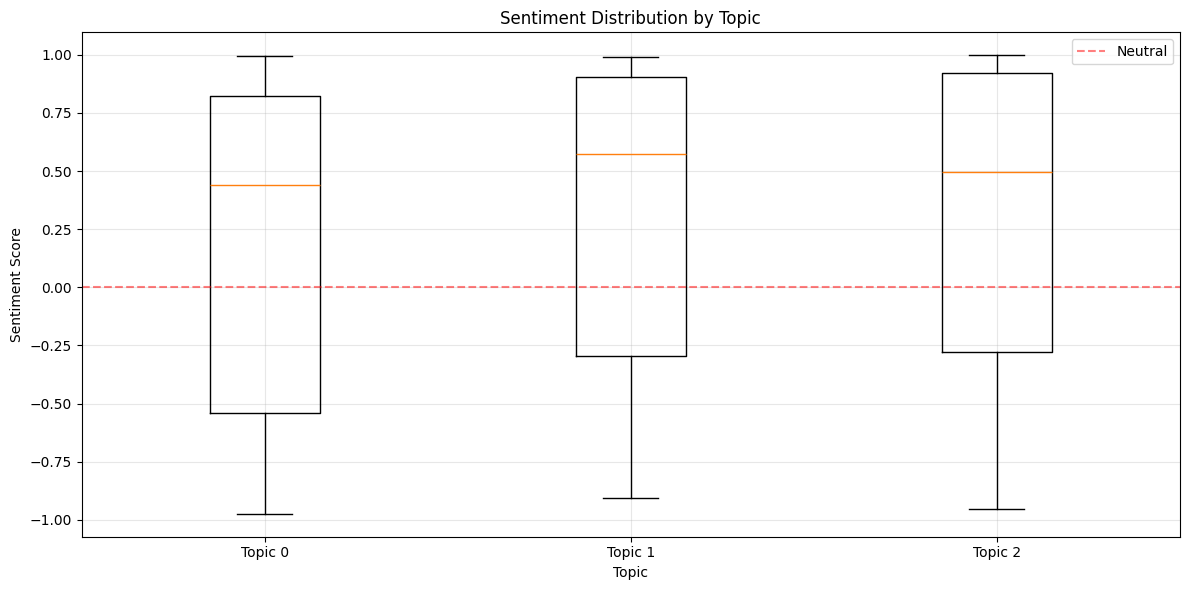

📊 Sentiment by topic visualization complete!


In [21]:
# Visualize sentiment distribution by topic
fig, ax = plt.subplots(figsize=(12, 6))

# Create box plot of sentiment scores by topic
topic_sentiment_data = [df[df['dominant_topic'] == i]['sentiment_score'].values
                        for i in range(num_topics)]

ax.boxplot(topic_sentiment_data, labels=[f'Topic {i}' for i in range(num_topics)])
ax.set_xlabel('Topic')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Distribution by Topic')
ax.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Neutral')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Sentiment by topic visualization complete!")

In [22]:
# Create comprehensive summary
print("📋 COMPLETE ANALYTICAL SUMMARY")
print("=" * 60)
print(f"\nDataset: {len(df)} documents")
print(f"\n1️⃣ TERM FREQUENCY (from HW4-1):")
print(f"   Vocabulary size: {len(dictionary)} unique words")
print(f"   [Your top words from HW4-1]")

print(f"\n2️⃣ SENTIMENT ANALYSIS (from HW4-1):")
print(f"   Average sentiment: {df['sentiment_score'].mean():.3f}")
print(f"   Positive: {len(df[df['sentiment_score'] > 0.1])} ({len(df[df['sentiment_score'] > 0.1])/len(df)*100:.1f}%)")
print(f"   Neutral: {len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])} ({len(df[(df['sentiment_score'] >= -0.1) & (df['sentiment_score'] <= 0.1)])/len(df)*100:.1f}%)")
print(f"   Negative: {len(df[df['sentiment_score'] < -0.1])} ({len(df[df['sentiment_score'] < -0.1])/len(df)*100:.1f}%)")

print(f"\n3️⃣ TOPIC MODELING (HW4-2):")
print(f"   Number of topics: {num_topics}")
for topic_num in range(num_topics):
    topic_docs = df[df['dominant_topic'] == topic_num]
    if len(topic_docs) > 0:
        topic_words = lda_model.show_topic(topic_num, 3)
        word_list = [word for word, prob in topic_words]
        print(f"   Topic {topic_num} ({len(topic_docs)} docs, avg sentiment {topic_docs['sentiment_score'].mean():.2f}): {', '.join(word_list)}")

📋 COMPLETE ANALYTICAL SUMMARY

Dataset: 200 documents

1️⃣ TERM FREQUENCY (from HW4-1):
   Vocabulary size: 2038 unique words
   [Your top words from HW4-1]

2️⃣ SENTIMENT ANALYSIS (from HW4-1):
   Average sentiment: 0.244
   Positive: 118 (59.0%)
   Neutral: 17 (8.5%)
   Negative: 65 (32.5%)

3️⃣ TOPIC MODELING (HW4-2):
   Number of topics: 3
   Topic 0 (91 docs, avg sentiment 0.17): superman, like, character
   Topic 1 (51 docs, avg sentiment 0.32): superman, character, que
   Topic 2 (58 docs, avg sentiment 0.29): superman, like, character


Sentiment columns added:
   vader_compound  textblob_polarity
0          0.8074           0.475000
1          0.0859           0.059127
2          0.9897           0.294452
3          0.9098           0.518750
4         -0.0772          -0.019048


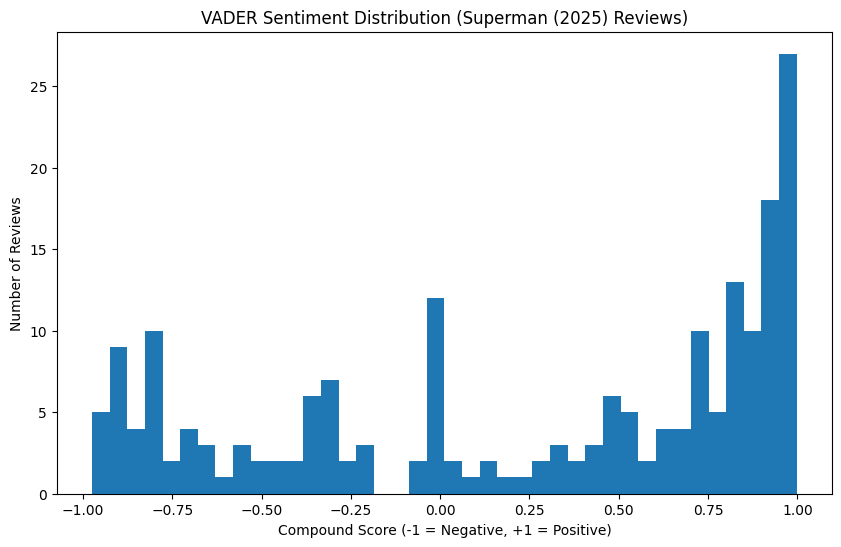

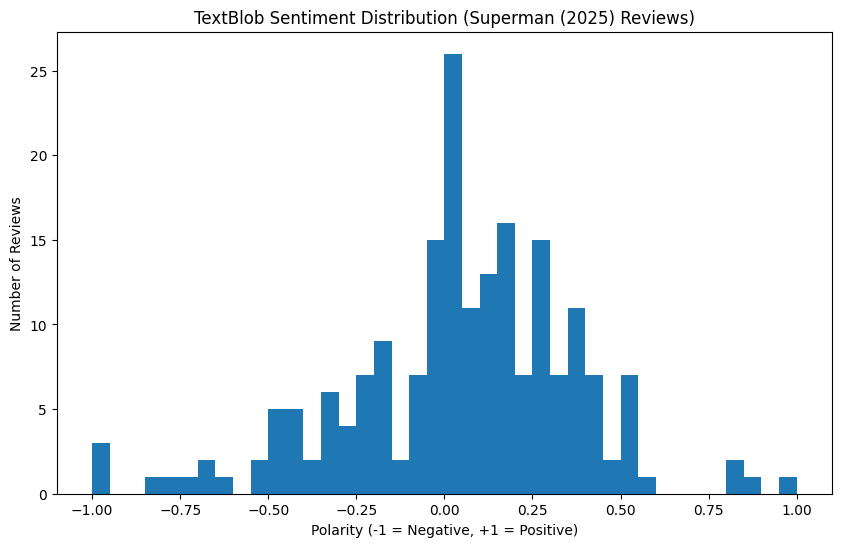

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# -----------------------
# SETTINGS
# -----------------------
review_col = "audience-reviews__review"  # your text column
analyzer = SentimentIntensityAnalyzer()

# -----------------------
# VADER SENTIMENT FUNCTION
# -----------------------
def vader_score(text):
    if pd.isna(text):
        return 0.0
    return analyzer.polarity_scores(str(text))["compound"]

# -----------------------
# TEXTBLOB SENTIMENT FUNCTION
# -----------------------
def textblob_polarity(text):
    if pd.isna(text):
        return 0.0
    return TextBlob(str(text)).sentiment.polarity

# -----------------------
# APPLY TO DATAFRAME
# -----------------------
df["vader_compound"] = df[review_col].apply(vader_score)
df["textblob_polarity"] = df[review_col].apply(textblob_polarity)

print("Sentiment columns added:")
print(df[["vader_compound", "textblob_polarity"]].head())

# -----------------------
# PLOT VADER DISTRIBUTION
# -----------------------
plt.figure(figsize=(10, 6))
plt.hist(df["vader_compound"], bins=40)
plt.title("VADER Sentiment Distribution (Superman (2025) Reviews)")
plt.xlabel("Compound Score (-1 = Negative, +1 = Positive)")
plt.ylabel("Number of Reviews")
plt.show()

# -----------------------
# PLOT TEXTBLOB DISTRIBUTION
# -----------------------
plt.figure(figsize=(10, 6))
plt.hist(df["textblob_polarity"], bins=40)
plt.title("TextBlob Sentiment Distribution (Superman (2025) Reviews)")
plt.xlabel("Polarity (-1 = Negative, +1 = Positive)")
plt.ylabel("Number of Reviews")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


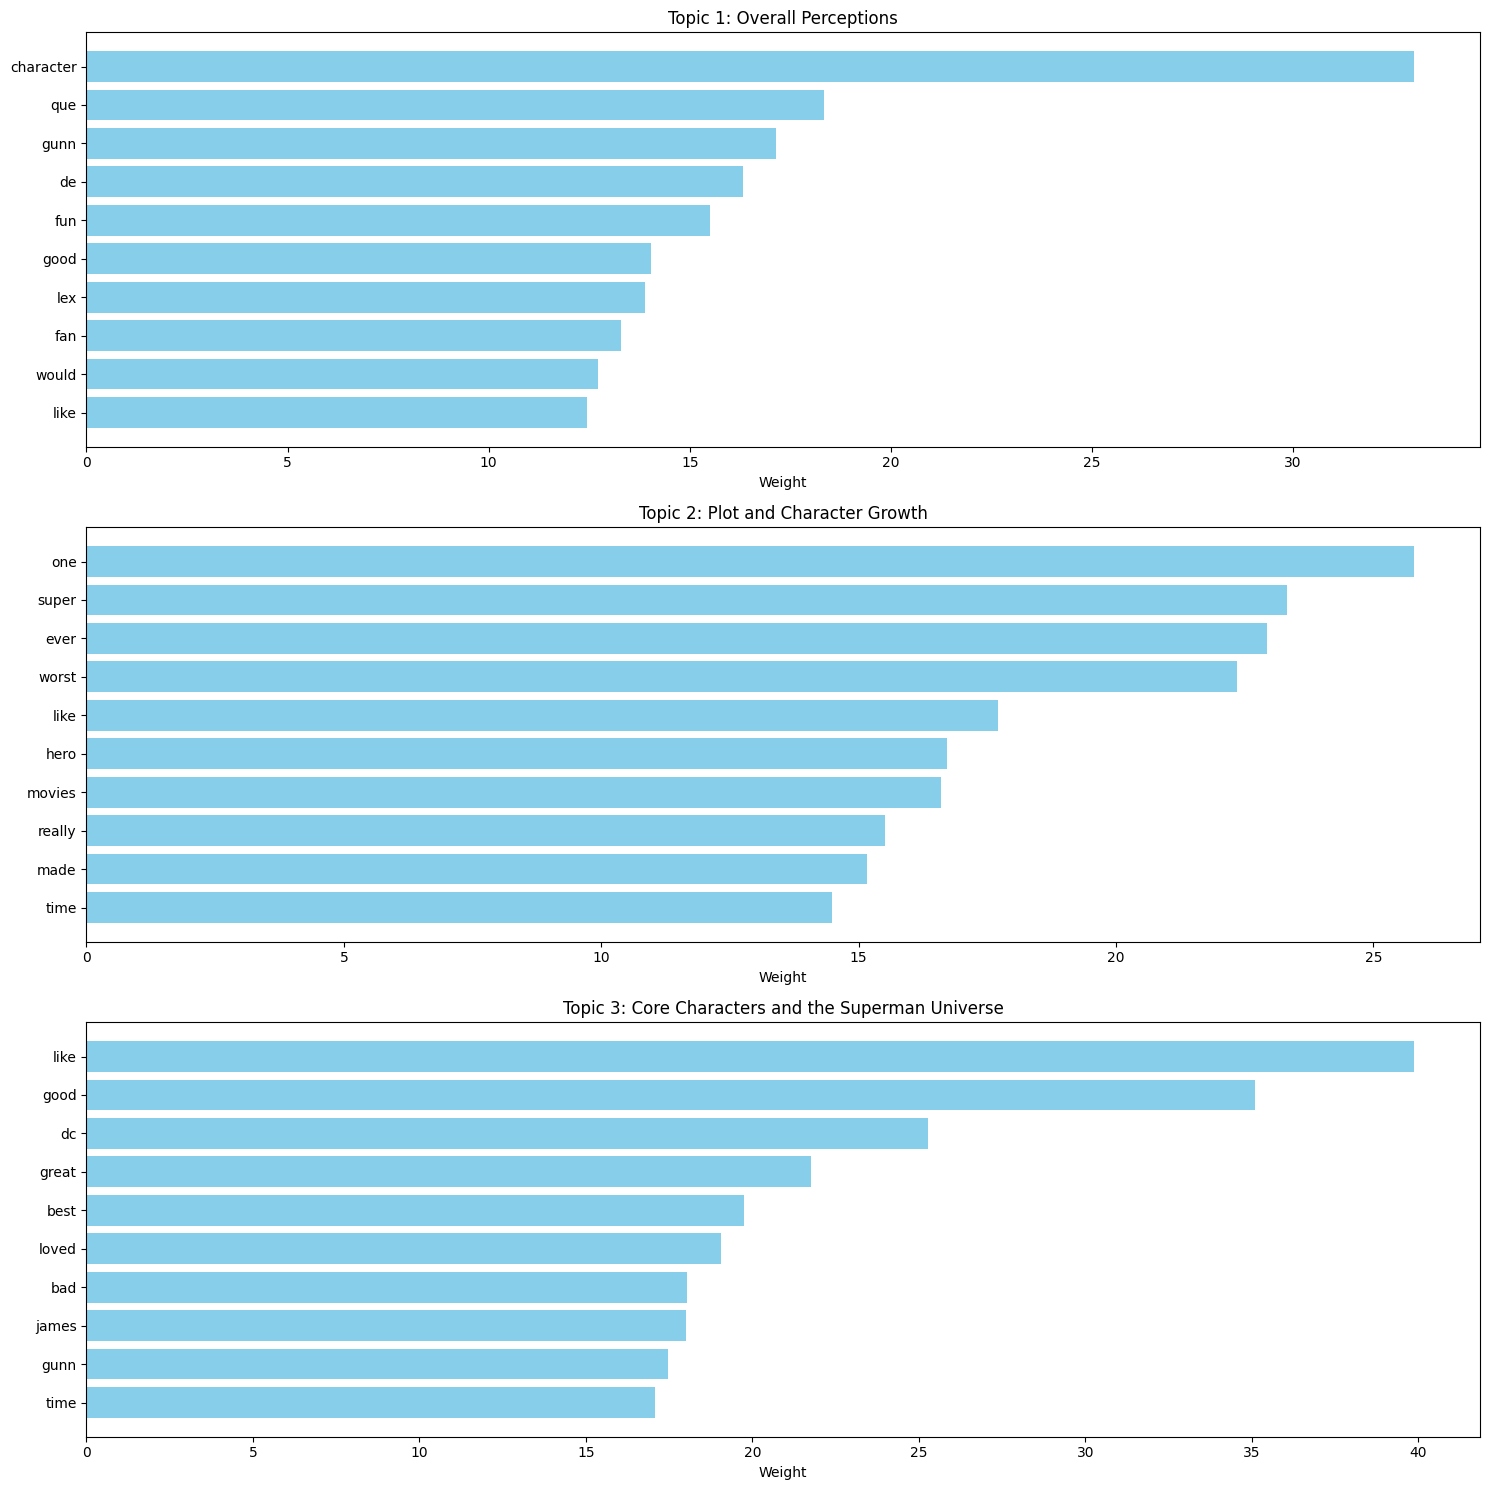

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# ------------------------------------
# LOAD COLUMN WITH REVIEWS
# ------------------------------------
text_col = "audience-reviews__review"
reviews = df[text_col].fillna("").astype(str).tolist()

# ------------------------------------
# BASIC CLEANING + STOPWORDS
# ------------------------------------
nltk.download("stopwords")
stop_words = stopwords.words("english")
stop_words.extend(["movie", "film", "superman", "man", "steel"])  # domain-specific optional removals

# ------------------------------------
# VECTORIZE TEXT
# ------------------------------------
vectorizer = CountVectorizer(
    stop_words=stop_words,
    max_df=0.95,
    min_df=5,
)
dtm = vectorizer.fit_transform(reviews)
feature_names = vectorizer.get_feature_names_out()

# ------------------------------------
# RUN LDA FOR 3 TOPICS
# ------------------------------------
lda = LatentDirichletAllocation(
    n_components=3,
    learning_method='batch',
    random_state=42
)
lda.fit(dtm)

# ------------------------------------
# FUNCTION TO PLOT TOP WORDS PER TOPIC
# ------------------------------------
def plot_topic_words(topic_idx, n_top_words=10, title="Topic"):
    topic = lda.components_[topic_idx]
    top_indices = topic.argsort()[-n_top_words:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    weights = topic[top_indices]

    plt.barh(top_words, weights, color="skyblue")
    plt.gca().invert_yaxis()
    plt.xlabel("Weight")
    plt.title(title)

# ------------------------------------
# PLOT 3 TOPICS
# ------------------------------------
plt.figure(figsize=(15, 15))

titles = [
    "Topic 1: Overall Perceptions",
    "Topic 2: Plot and Character Growth",
    "Topic 3: Core Characters and the Superman Universe"
]

for i in range(3):
    plt.subplot(3, 1, i + 1)
    plot_topic_words(i, 10, titles[i])

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


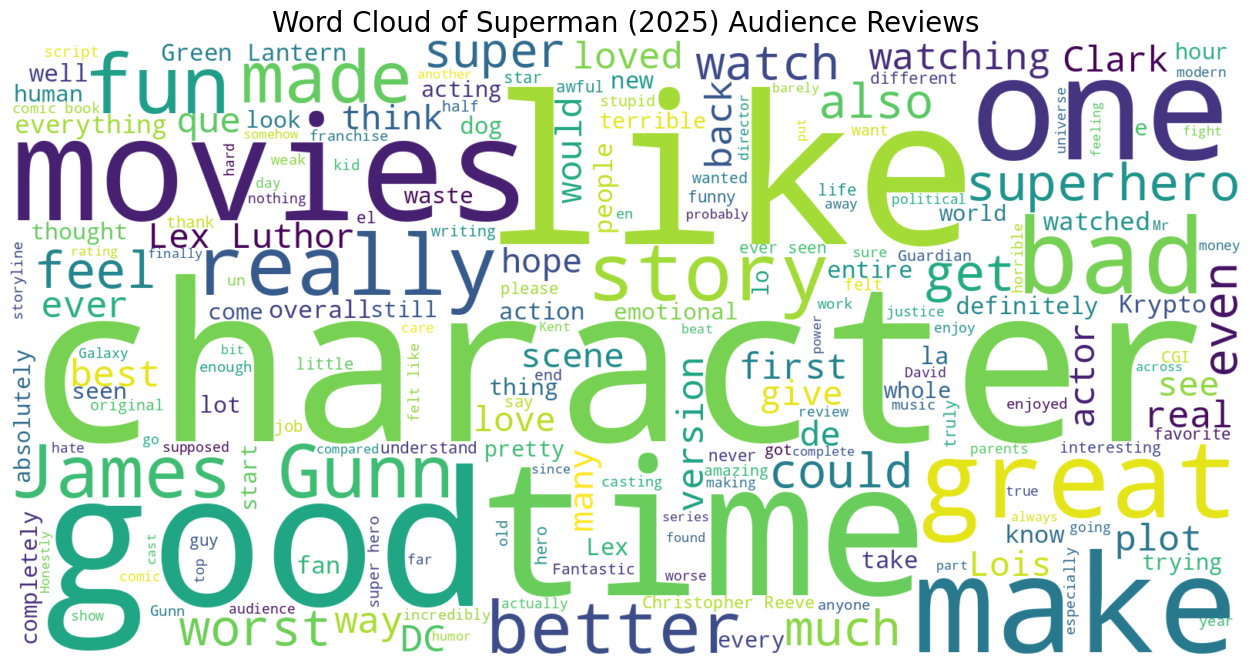

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# ------------------------------------
# LOAD TEXT COLUMN
# ------------------------------------
text_col = "audience-reviews__review"

# Join all reviews into one long string
all_text = " ".join(df[text_col].fillna("").astype(str).tolist())

# ------------------------------------
# STOPWORDS
# ------------------------------------
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Optionally remove movie-specific words
stop_words.update(["movie", "film", "superman", "man", "steel"])

# ------------------------------------
# GENERATE WORD CLOUD
# ------------------------------------
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color="white",
    stopwords=stop_words,
    collocations=True
).generate(all_text)

# ------------------------------------
# PLOT WORD CLOUD
# ------------------------------------
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Superman (2025) Audience Reviews", fontsize=20)
plt.show()
